In [1]:
%matplotlib inline

import warnings

import matplotlib.pyplot as plt
import nengo
from nengo.utils.matplotlib import rasterplot
import numpy as np
import tensorflow as tf

import nengo_dl


warnings.simplefilter("ignore")
tf.get_logger().addFilter(lambda rec: "Tracing is expensive" not in rec.msg)

In [2]:
# download MNIST dataset
(train_data, _), (test_data, _) = tf.keras.datasets.mnist.load_data()
# flatten images
train_data = train_data.reshape((train_data.shape[0], -1))
test_data = test_data.reshape((test_data.shape[0], -1))

n_epochs = 2
n_in = train_data.shape[1]

print(train_data.shape)

(60000, 784)


Tensorflow Implementation of Autoencoder

In [3]:
import tensorflow as tf
n_hidden = 64
minibatch_size = 50

class auto_enc_tf(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(n_hidden, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(n_in, activation=tf.nn.relu)

  def call(self, inputs):
    x = self.dense1(inputs)
    return self.dense2(x)

  def hidden_rep(self, inputs):
    x = self.dense1(inputs)
    y = self.dense2(x)
    return x,y

Epoch 1/2
1200/1200 [==============================] - 2s 954us/step - loss: 1394.7910
Epoch 2/2
313/313 [==============================] - 0s 647us/step - loss: 883.2199


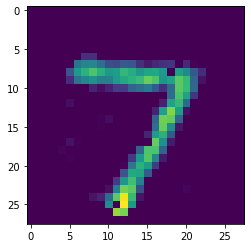

In [4]:
model = auto_enc_tf()
model.compile(optimizer=tf.optimizers.RMSprop(1e-3), loss=tf.losses.mse)

# run training loop
model.fit(train_data, train_data, epochs=n_epochs, batch_size=minibatch_size)

# evaluate performance on test set
model.evaluate(test_data, test_data)

# display example output
output = model.predict(test_data[[0]])
plt.figure()
plt.imshow(output[0].reshape((28, 28)))
plt.show()


Get hidden latent representation of normal 1 hidden layer ANN auto-encoder

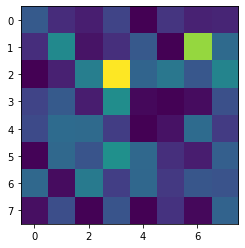

Mean of the hidden space rep: 0.09524098


In [5]:
hidden_rep = model.hidden_rep(test_data[[0]])
plt.figure()
plt.imshow(hidden_rep[0].numpy().reshape((8, 8)))
plt.show()

hidden_rep = hidden_rep[0].numpy()
norm = np.linalg.norm(hidden_rep)
hidden_rep = hidden_rep/norm
print('Mean of the hidden space rep:', hidden_rep.mean())